# BAYES-LOSVD Notebook

This is a simple jupyter notebook that will guide you through the usage of the code.  

It consists on a number of steps:

- **Step 1:** Compile codes
- **Step 2:** Preprocess data  
- **Step 3:** Run code
- **Step 4:** Inspect results
  
  

In [1]:
%%html
<style>
table {float:left}
</style>

## STEP 1: Compile Stan codes

- This code will compile all the necessary Stan codes used in bayes-losvd_run.py.
- Should you create your own model, please run this routine again. 
- It will automatically detect the new Stan code and it will compile it.

In [2]:
run bayes-losvd_compile_codes.py

               BAYES-LOSVD                 
             (compile codes)               



[ RUNNING ] stan_model/bayes-losvd_model_GH_full_series.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_GH_full_series.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_Bsplines.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_Bsplines.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_ghfit.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_ghfit.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_SP.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_SP.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_RW.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_RW.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_AR.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_AR.stan compiled.



## STEP 2: Preprocess data

| Flag | Alt. flag      | Description                  | Options and default values |
|------|----------------|------------------------------|----------------------------|
| -c   | --config       | path to preproc configuration file | ../config_files/example_preproc.properties      |


In [5]:
run bayes-losvd_preproc_data.py -c ../config_files/example_preproc.properties

               BAYES-LOSVD                 
             (preproc_data)                



[ RUNNING ] NGC4550_SAURON

--------------------------------------------
- Input run name:   NGC4550_SAURON
- Survey:           SAURON_E3D
- Wavelength range: 4825.0-5300.0
- Target SNR:       150.0
- Min SNR:          3.0
- Redshift:         0.00153
- Velscale:         60.0
- LOSVD Vmax:       700.0
- Mask file:        emission_lines.mask
- Pol. order:       5
- Templates:        MILES_SSP
- Number of PCA:    5
--------------------------------------------

# Processing data .....

 - Reading the data and basic info

 - Correcting data for redshift

 - Cutting data to desired wavelength range

 - Computing the SNR of each spaxel

 - Selecting spaxels aboove SNR_min

 - Computing the Voronoi binning
   - 196 Voronoi bins required
   - Applying the Voronoi binning




 - Log-rebinning and normalizing the spectra




 - Defining the data mask

 - Storing everything in data structure

# Processing templates .....

 - Creating the LOSVD velocity vector

 - 636 templates found in MILES_SSP library

 - Loading and preparing the templates...




 - Running PCA on the templates...
  5 PCA components explain  99.884% of the variance in the input library

 - Convolving the templates to match the data's LSF




 - Log-rebinning the templates

 - Storing everything in templates structure

# Saving preproc data: ../preproc_data/NGC4550_SAURON.hdf5

# Plotting some basic info in ../preproc_data/NGC4550_SAURON.pdf


[ DONE ] NGC4550_SAURON



[ RUNNING ] NGC4210_CALIFA

--------------------------------------------
- Input run name:   NGC4210_CALIFA
- Survey:           CALIFA-V1200
- Wavelength range: 3800.0-4550.0
- Target SNR:       40.0
- Min SNR:          3.0
- Redshift:         0.00911
- Velscale:         60.0
- LOSVD Vmax:       700.0
- Mask file:        emission_lines.mask
- Pol. order:       7
- Templates:        MILES_SSP
- Number of PCA:    6
--------------------------------------------

# Processing data .....

 - Reading the data and basic info

 - Correcting data for redshift

 - Cutting data to desired wavelength range

 - Computing the SNR of each spaxel

 - Selecting spaxels aboove SNR_min

 - Computing the Voronoi binning
   - 74 Voronoi bins required
   - Applying the Voronoi b



 - Log-rebinning and normalizing the spectra




 - Defining the data mask

 - Storing everything in data structure

# Processing templates .....

 - Creating the LOSVD velocity vector

 - 636 templates found in MILES_SSP library

 - Loading and preparing the templates...




 - Running PCA on the templates...
  6 PCA components explain  99.961% of the variance in the input library

 - Convolving the templates to match the data's LSF


[ WARNING ] Some values of the data LSF are below the templates values





 - Log-rebinning the templates

 - Storing everything in templates structure

# Saving preproc data: ../preproc_data/NGC4210_CALIFA.hdf5

# Plotting some basic info in ../preproc_data/NGC4210_CALIFA.pdf


[ DONE ] NGC4210_CALIFA



## STEP 3: Run code

| Flag | Alt. flag       | Description                                  | Options and default values |
|------|-----------------|----------------------------------------------|----------------------------|
| -f   | --preproc_file  | path to preproc preproc file                 | No default                 |
| -i   | --niter         | number of iterationsto run in Stan           |    500       |
| -c   | --nchain        | number of simultaneous chains to run in Stan |  1      |    
| -b   | --bin           | bin IDs for spectra run                      |  all/odd/even/bin_list (comma separated bin list)      |    
| -m   | --mask_bin      | bin IDs to ignore from bin list              |  None      |    
| -t   | --fit_type      | type of fit                                  | see codes.properties file       |    
| -n   | --njobs         | number of jobs (spectra) to run in parallel  |   1     |    
| -v   | --verbose       | printing Stan summary for each fit           | 0=False or 1=True, Default: 0       |    
| -s   | --save_chains   | save chain results for each fit              | 0=False or 1=True, Default: 0       |    
| -p   | --save_plots    | save diagnostic plots                        | 0=False or 1=True, Default: 0      |    
| -a   | --adapt_delta   | Stan Adapt_delta                             |  0.99      |    
| -d   | --max_treedepth | Stan maximum tree depth                      | 18 |   




In [4]:
run bayes-losvd_run.py -f ../preproc_data/NGC4550_SAURON.hdf5 -b 0 -t SP -v 1

               BAYES-LOSVD                 
                  (run)                    

# Selected bins: 0


[ RUNNING ] NGC4550_SAURON - Bin: 0 - Fit type: SP

Using cached StanModel for stan_model/bayes-losvd_model_SP.stan

# Saving Stan summary: ../results/NGC4550_SAURON-SP/NGC4550_SAURON-SP_Stan_summary_bin0.txt

Inference for Stan model: anon_model_2a44c6d6be5ce9019f387951107a63da.
1 chains, each with iter=500; warmup=250; thin=1; 
post-warmup draws per chain=250, total post-warmup draws=250.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
losvd[1]   1.3e-3  8.3e-5 1.2e-3 4.6e-5 4.0e-4 1.0e-3 1.9e-3 4.2e-3    203    1.0
losvd[2]   1.5e-3  7.2e-5 1.4e-3 3.3e-5 4.5e-4 9.6e-4 2.1e-3 5.5e-3    372    1.0
losvd[3]   1.5e-3  1.0e-4 1.6e-3 2.9e-5 3.9e-4 1.0e-3 2.3e-3 5.3e-3    253    1.0
losvd[4]   1.9e-3  1.1e-4 1.8e-3 4.6e-5 5.5e-4 1.3e-3 2.7e-3 6.5e-3    284    1.0
losvd[5]   2.9e-3  1.4e-4 2.4e-3 7.8e-5 1.0e-3 2.2e-3 4.1e-3 9.0e-3    298    1.0
los

## STEP 4: Inspect results

| Flag | Alt. flag      | Description                    | Options and default values  |
|------|----------------|--------------------------------|-----------------------------|
| -r   | --run          | run name with results          | No default                  |
| -b   | --binID        | bin ID of the spectrum to plot | 0                           |
| -l   | --losvd        | path to a LOSVD to add to plot | None                        |
| -s   | --save         | save figure in results dir     | 0=False, 1=True, Default= 0 |
| -n   | --norm         | nomalise LOSVD                 | 1                           |
| -d   | --dir          | path to directory with results | ../results                  |


               BAYES-LOSVD                 
             (inspect_fits)                


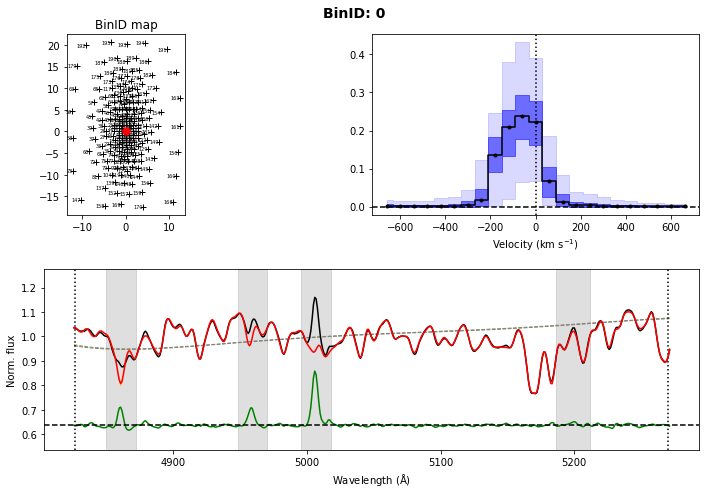



[ DONE ] NGC4550_SAURON-SP - Bin: 0



In [1]:
run bayes-losvd_inspect_fits.py -r NGC4550_SAURON-SP -b 0